In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the data
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

D:\Program Files\Anaconda\envs\TitanicProject\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, ' Survived / Not Survived Ratio ')

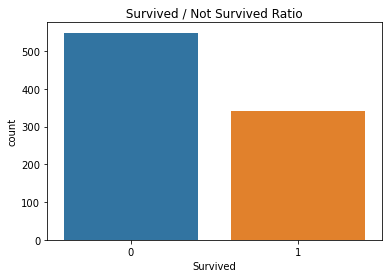

In [7]:
sns.countplot(data.Survived)
plt.title(' Survived / Not Survived Ratio ')

0 - Not Survived (549)
1 - Survived (342)
Clearly majority did not survived

## Missing value Treatment

In [68]:
# Find the ratio of missing value columnwise

missing_count = data.isnull().sum()
missing_perc = data.isnull().mean() * 100
missing_df = pd.concat([missing_count, missing_perc], axis = 'columns')
missing_df.rename(columns = {0:'Count',1:'Percentage'}, inplace = True)
missing_df = (missing_df[missing_df['Count'] != 0.0]).sort_values(by = 'Count', ascending = False)
missing_df

,Count,Percentage
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
